In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
def plot_cla(model,x,y):
    x_min,x_max = x[:,0].min() - 0.1,x[:,0].max() +0.1
    y_min,y_max = x[:,1].min()-0.1,x[:,1].max()+0.1
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                        np.linspace(y_min,y_max,100))
    x_in = np.c_[xx.ravel(),yy.ravel()]
    y_pred = model.predict(x_in)
    if model.output_shape[-1] >1:
        print('Multipleclass Classification')
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('Binary Calssification')
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
    plt.figure(figsize=(8,8))
    plt.contourf(xx,yy,y_pred)
    plt.scatter(x[:,0],x[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=10): 
  # Create the confustion matrix
  cm = confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) 
  fig.colorbar(cax)
  
  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
def model_details(model = None):
    return tf.keras.utils.plot_model(model,to_file='model.png', show_shapes=True, show_dtype=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96, layer_range=None, show_layer_activations=True)

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
                                                    color=color)

# Multi class classification
If we have more than one class to predict then it is multiclass cassification

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


8


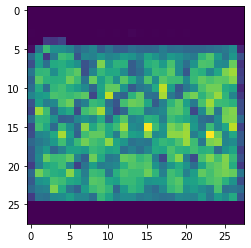

In [ ]:
plt.imshow(train_data[23]),
print(train_labels[23])

In [ ]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Pullover')

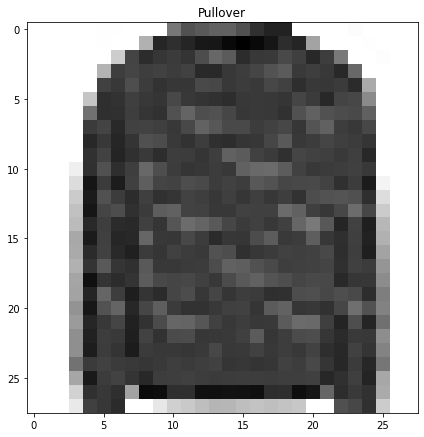

In [ ]:
choice = 234
plt.figure(figsize=(7,10))
plt.imshow(train_data[choice],cmap=plt.cm.binary)
plt.title(class_name[train_labels[choice]])

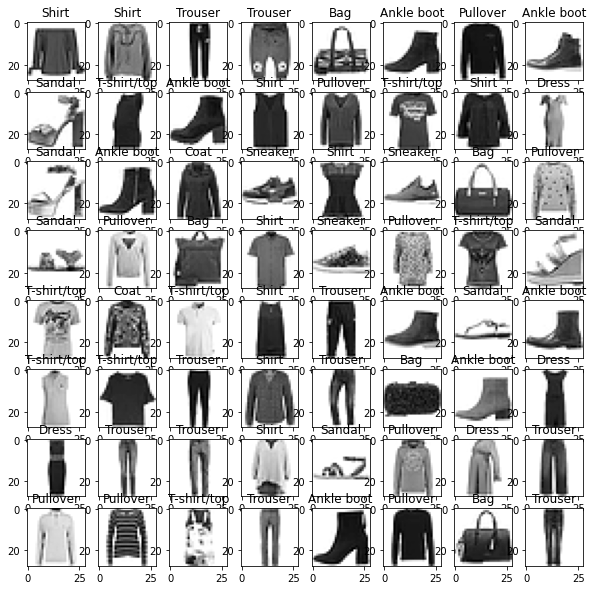

In [ ]:
plt.figure(figsize=(10,10))
for i in range(64):
    r = random.choice(range(len(train_data)))
    plt.subplot(8,8,i+1)
    plt.imshow(train_data[r],cmap=plt.cm.binary)
    plt.title(class_name[train_labels[r]])

# Building multiclass classification model
* first calculate the input shape = 28*28
* modify the output shape|number of classes = 10
* loss = catogericalcrossentropy for labels which are one hot encoded | sparsecatogericalentropy for integers
* output activation = softmax

In [ ]:
tf.random.set_seed(2)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # flatten the multidimention layer to a single dimention
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = 'Adam',
    metrics = ['accuracy']
)
not_normal_history = model.fit(train_data,tf.one_hot(train_labels,depth=10),epochs=10,validation_data=(test_data,tf.one_hot(test_labels,depth=10)),verbose=2)

Epoch 1/10
1875/1875 - 4s - loss: 2.1384 - accuracy: 0.1727 - val_loss: 1.7565 - val_accuracy: 0.3112 - 4s/epoch - 2ms/step
Epoch 2/10
1875/1875 - 8s - loss: 1.6946 - accuracy: 0.2997 - val_loss: 1.6342 - val_accuracy: 0.3146 - 8s/epoch - 4ms/step
Epoch 3/10
1875/1875 - 7s - loss: 1.6171 - accuracy: 0.3120 - val_loss: 1.6108 - val_accuracy: 0.3148 - 7s/epoch - 4ms/step
Epoch 4/10
1875/1875 - 7s - loss: 1.5887 - accuracy: 0.3211 - val_loss: 1.5614 - val_accuracy: 0.3349 - 7s/epoch - 4ms/step
Epoch 5/10
1875/1875 - 6s - loss: 1.5706 - accuracy: 0.3278 - val_loss: 1.5685 - val_accuracy: 0.3334 - 6s/epoch - 3ms/step
Epoch 6/10
1875/1875 - 5s - loss: 1.5535 - accuracy: 0.3309 - val_loss: 1.5648 - val_accuracy: 0.3363 - 5s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 6s - loss: 1.5471 - accuracy: 0.3364 - val_loss: 1.5360 - val_accuracy: 0.3382 - 6s/epoch - 3ms/step
Epoch 8/10
1875/1875 - 4s - loss: 1.5341 - accuracy: 0.3412 - val_loss: 1.5280 - val_accuracy: 0.3488 - 4s/epoch - 2ms/step
Epoch 9/

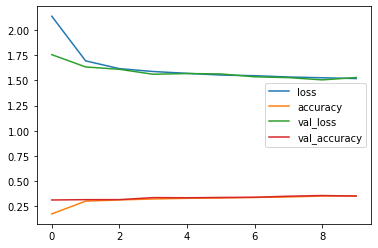

In [ ]:
pd.DataFrame(not_normal_history.history).plot()

In [ ]:
test_pred = model.predict(test_data)
test_pred = test_pred.argmax(axis=1)

313/313 [==============================] - 1s 4ms/step


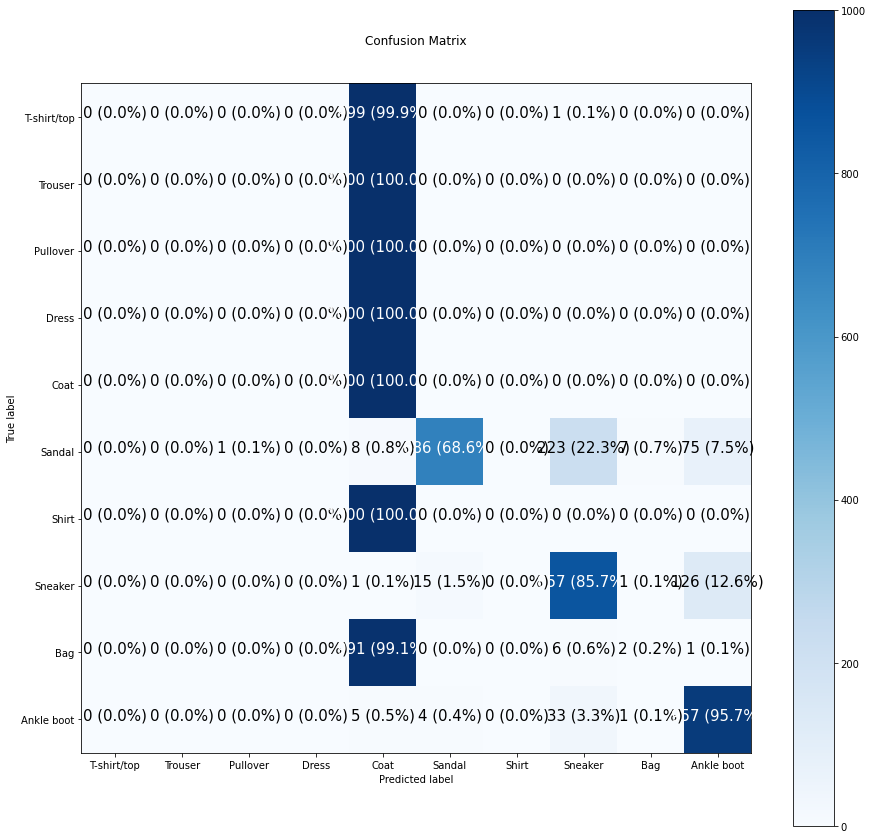

In [ ]:
make_confusion_matrix(test_labels,test_pred,classes=class_name,figsize=(15, 15))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


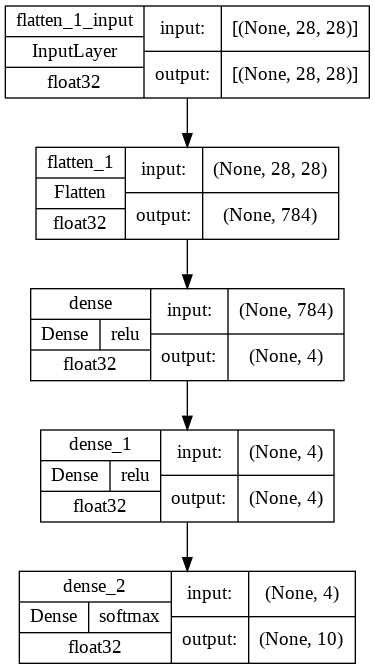

In [ ]:
model_details(model)

In [ ]:
train_data.max(),train_data.min()

(255, 0)

Neural network need data to be scaled so we need to scale the data between 0-1

In [ ]:
# we can get our training and test data between 0 and 1 by simply dividing data by train_data.max() value
train_data_normal = train_data / 255
test_data_normal = test_data / 255

train_data_normal.max(),train_data_normal.min()

(1.0, 0.0)

In [ ]:
tf.random.set_seed(2)
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(30,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(15,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model1.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = 'Adam',
    metrics = ['accuracy']
)
normal_history = model1.fit(train_data_normal,tf.one_hot(train_labels,depth=10),epochs=10,validation_data=(test_data_normal,tf.one_hot(test_labels,depth=10)),verbose=2)

Epoch 1/10
1875/1875 - 7s - loss: 0.6091 - accuracy: 0.7832 - val_loss: 0.4690 - val_accuracy: 0.8346 - 7s/epoch - 4ms/step
Epoch 2/10
1875/1875 - 3s - loss: 0.4307 - accuracy: 0.8476 - val_loss: 0.4634 - val_accuracy: 0.8297 - 3s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 3s - loss: 0.3922 - accuracy: 0.8593 - val_loss: 0.4302 - val_accuracy: 0.8395 - 3s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 4s - loss: 0.3685 - accuracy: 0.8654 - val_loss: 0.4252 - val_accuracy: 0.8459 - 4s/epoch - 2ms/step
Epoch 5/10
1875/1875 - 4s - loss: 0.3518 - accuracy: 0.8710 - val_loss: 0.4125 - val_accuracy: 0.8503 - 4s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 3s - loss: 0.3403 - accuracy: 0.8760 - val_loss: 0.3940 - val_accuracy: 0.8585 - 3s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 4s - loss: 0.3301 - accuracy: 0.8781 - val_loss: 0.3722 - val_accuracy: 0.8664 - 4s/epoch - 2ms/step
Epoch 8/10
1875/1875 - 4s - loss: 0.3201 - accuracy: 0.8816 - val_loss: 0.3746 - val_accuracy: 0.8689 - 4s/epoch - 2ms/step
Epoch 9/

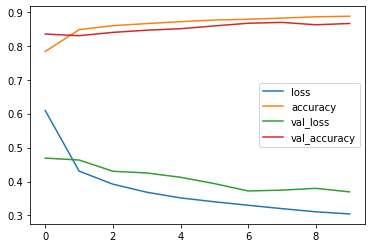

In [ ]:
pd.DataFrame(normal_history.history).plot()

In [ ]:
model1.predict(test_data_normal).argmax(axis=1)

313/313 [==============================] - 1s 3ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
test_pred_normal = model1.predict(test_data_normal)
test_pred_normal = test_pred_normal.argmax(axis=1)

313/313 [==============================] - 1s 3ms/step


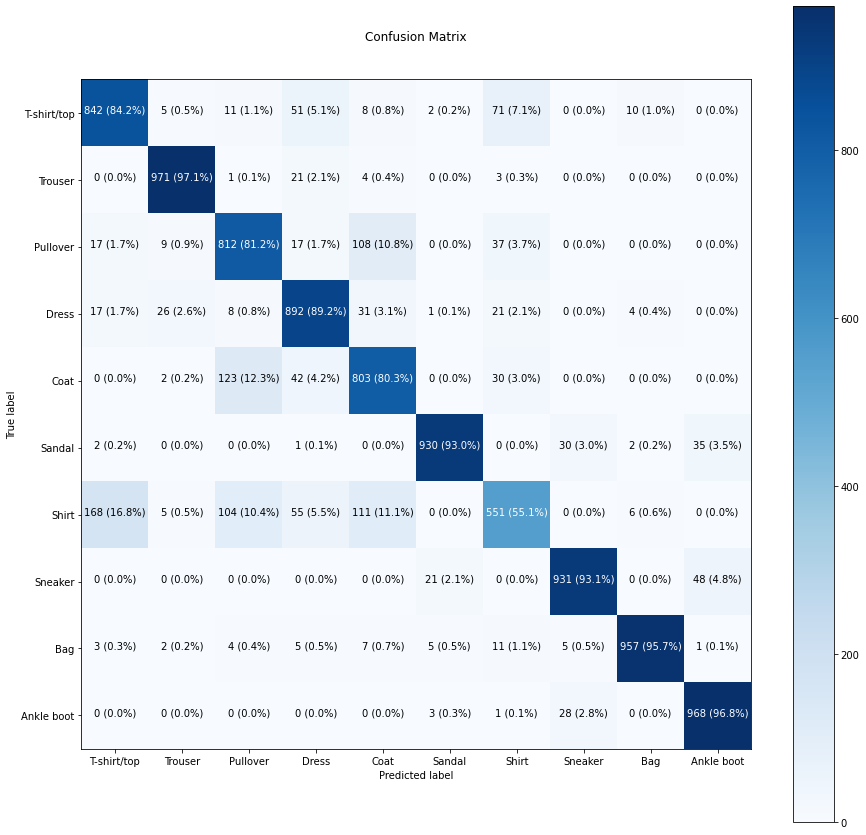

In [ ]:
make_confusion_matrix(test_labels,test_pred_normal,classes=class_name,figsize=(15, 15),text_size=10)

In [ ]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 30)                23550     
                                                                 
 dense_10 (Dense)            (None, 20)                620       
                                                                 
 dense_11 (Dense)            (None, 15)                315       
                                                                 
 dense_12 (Dense)            (None, 10)                160       
                                                                 
Total params: 24,645
Trainable params: 24,645
Non-trainable params: 0
_________________________________________________________________


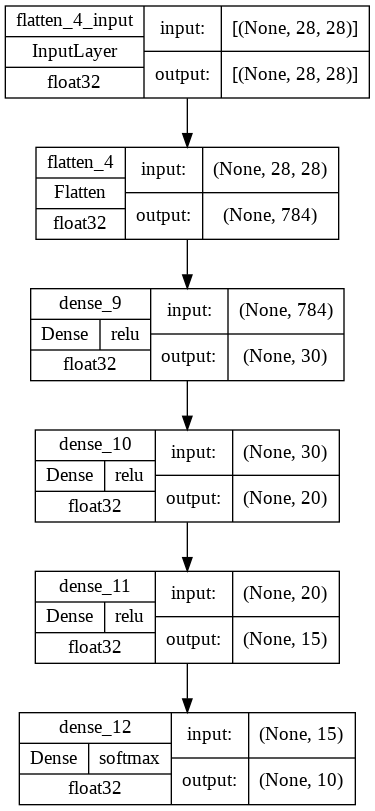

In [ ]:
model_details(model1)

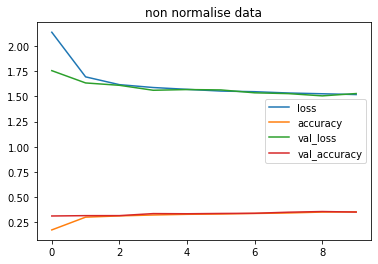

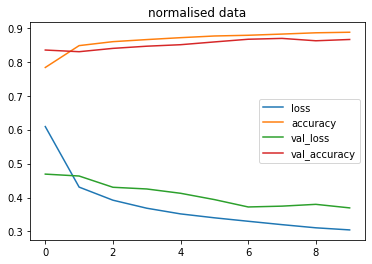

In [ ]:
pd.DataFrame(not_normal_history.history).plot(title='non normalise data')
pd.DataFrame(normal_history.history).plot(title='normalised data')

# calculating best|ideal learning rate to our

In [ ]:
tf.random.set_seed(2)
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)
# creating learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
lr_history = model2.fit(train_data_normal,train_labels,epochs=50,callbacks=[lr_schedular],validation_data=(test_data,test_labels))

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6033 - accuracy: 0.3282 - val_loss: 93.9121 - val_accuracy: 0.2872 - lr: 0.0010
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3147 - accuracy: 0.4090 - val_loss: 126.4509 - val_accuracy: 0.2916 - lr: 0.0011
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2461 - accuracy: 0.4290 - val_loss: 136.5595 - val_accuracy: 0.2920 - lr: 0.0013
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2076 - accuracy: 0.4521 - val_loss: 124.6636 - val_accuracy: 0.2887 - lr: 0.0014
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1502 - accuracy: 0.5056 - val_loss: 142.9475 - val_accuracy: 0.2971 - lr: 0.0016
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0371 - accuracy: 0.5701 - val_loss: 143.9313 - val_accuracy: 0.2998 - lr: 0.0018
Epoch 7/50
1875/1875 [=========================

In [ ]:
epoch = 2
print(lambda epoch: 1e-3 * 10**(40/20))

<function <lambda> at 0x7f70ef4b3c10>


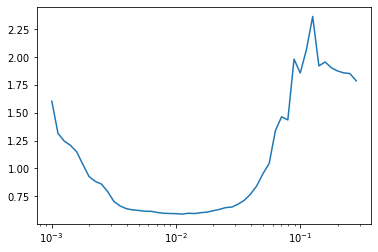

In [ ]:
lrs = 1e-3 * (10**(np.arange(50)/20))
plt.semilogx(lrs,lr_history.history["loss"])

In [ ]:
tf.random.set_seed(2)
model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model4.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.002),
    metrics = ['accuracy']
)
normal_history_lr = model4.fit(train_data_normal,tf.one_hot(train_labels,depth=10),epochs=10,validation_data=(test_data_normal,tf.one_hot(test_labels,depth=10)),verbose=2)

Epoch 1/10
1875/1875 - 6s - loss: 1.3890 - accuracy: 0.4629 - val_loss: 0.8628 - val_accuracy: 0.7158 - 6s/epoch - 3ms/step
Epoch 2/10
1875/1875 - 3s - loss: 0.7944 - accuracy: 0.7279 - val_loss: 0.7749 - val_accuracy: 0.7316 - 3s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 3s - loss: 0.7251 - accuracy: 0.7444 - val_loss: 0.7328 - val_accuracy: 0.7443 - 3s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 4s - loss: 0.6891 - accuracy: 0.7539 - val_loss: 0.7044 - val_accuracy: 0.7491 - 4s/epoch - 2ms/step
Epoch 5/10
1875/1875 - 3s - loss: 0.6682 - accuracy: 0.7586 - val_loss: 0.6875 - val_accuracy: 0.7472 - 3s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 3s - loss: 0.6496 - accuracy: 0.7637 - val_loss: 0.6635 - val_accuracy: 0.7615 - 3s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 3s - loss: 0.6377 - accuracy: 0.7680 - val_loss: 0.6599 - val_accuracy: 0.7673 - 3s/epoch - 2ms/step
Epoch 8/10
1875/1875 - 4s - loss: 0.6256 - accuracy: 0.7731 - val_loss: 0.6566 - val_accuracy: 0.7677 - 4s/epoch - 2ms/step
Epoch 9/

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

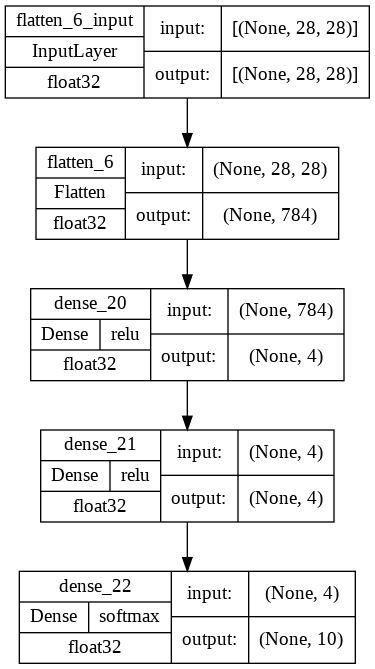

In [ ]:
model_details(model4)

1/1 [==============================] - 0s 17ms/step


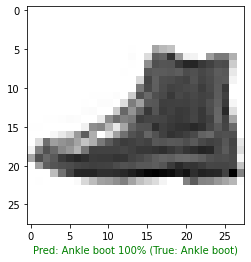

In [ ]:
plot_random_image(model=model4, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_name)

In [ ]:
weights, biases = model4.layers[1].get_weights()

In [ ]:
weights,biases

(array([[-0.88962287,  0.5055191 , -0.04801019, -0.51571506],
        [-0.00289859, -0.12402663,  0.0113242 , -0.7075607 ],
        [-1.7014613 , -0.04844899,  0.07612188,  1.0646653 ],
        ...,
        [ 0.5871768 , -0.04172429, -0.09535191, -0.63889587],
        [ 0.20702893,  0.5467832 , -0.00768941, -0.8367864 ],
        [-0.314393  ,  0.07062916,  0.05671716,  0.09974481]],
       dtype=float32),
 array([ 0.9896791 , -0.71663046, -0.02464156,  1.0841091 ], dtype=float32))

In [ ]:
weights.shape

(784, 4)

In [ ]:
test_labels.shape

(10000,)

In [ ]:
model1.layers

In [ ]:
# Extracting particular layer
model1.layers[1]#first training layer

In [ ]:
# getting patterns
weights,biases = model1.layers[1].get_weights()

weights

array([[ 0.21431434,  0.02979032, -0.17327407, ...,  0.0362461 ,
        -0.23561162,  0.32606027],
       [ 0.02934769, -0.23782898, -0.08640906, ..., -0.00066706,
         0.06795947,  0.29716355],
       [ 0.35517138, -0.47561112, -0.44037655, ..., -0.08433384,
        -0.03735076,  0.39392158],
       ...,
       [ 0.00882313, -0.15022087,  0.04273643, ..., -0.00807754,
         0.0533614 ,  0.00772985],
       [ 0.21082234,  0.29278168,  0.33579478, ...,  0.07881247,
        -0.31854814,  0.05363092],
       [ 0.39433122, -0.18148644, -0.03107263, ...,  0.05131062,
         0.02715344,  0.03071755]], dtype=float32)

In [ ]:
weights.shape,28*28

((784, 30), 784)

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 30)                23550     
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 15)                315       
                                                                 
 dense_3 (Dense)             (None, 10)                160       
                                                                 
Total params: 24,645
Trainable params: 24,645
Non-trainable params: 0
_________________________________________________________________


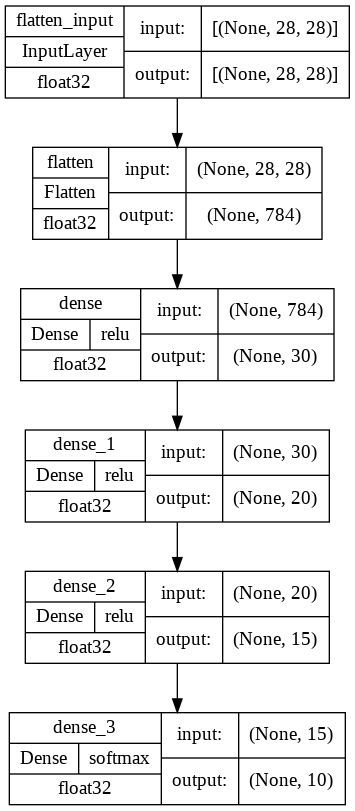

In [ ]:
model_details(model1)

In [ ]:
biases

array([-0.15468724, -0.10653865,  0.51932454,  0.22954597, -0.01623874,
        1.0664122 , -0.18640022,  0.5020821 , -0.35753596, -0.19214581,
       -0.16208051,  0.01096211,  0.27128708,  0.00180266, -0.05592567,
        0.3043732 ,  0.27262735,  0.90210456, -0.08938028,  0.45046812,
       -0.31474695,  0.27160543, -0.0230317 , -0.09516905, -0.20924067,
        0.49656022,  0.48249698, -0.01971348,  0.5567065 , -0.44565192],
      dtype=float32)